# Vehicle Maintenance Prediction - Model Training

This notebook demonstrates the end-to-end machine learning pipeline for predicting vehicle maintenance requirements.

### Objectives:
1. Load vehicle telemetry data.
2. Preprocess data using Scikit-Learn Pipelines.
3. Train Logistic Regression and Decision Tree models.
4. Evaluate and compare performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import os

# Add the project root to the path so we can import our modules
sys.path.append(os.path.abspath('..'))

from ml.preprocessing import preprocess_data, get_preprocessing_pipeline
from ml.train import train_models
from ml.evaluate import evaluate_model, get_feature_importance

print("Libraries and modules imported successfully.")

Libraries and modules imported successfully.


## 1. Load Data
We use the sample data generated by our utility script.

In [2]:
data_path = '../data/sample_vehicle_data.csv'

# Generate sample data if it doesn't exist
if not os.path.exists(data_path):
    from data.generate_sample_data import generate_data
    generate_data()

df = pd.read_csv(data_path)
df.head()

Sample data generated: /Users/viru/Desktop/projects/vehicle-maintenance-ai/data/sample_vehicle_data.csv


,vehicle_id,mileage,engine_hours,fault_code_count,last_service_days,temperature_avg,maintenance_required
0,V-1000,126958,1933.926899,8,67,88.915679,1
1,V-1001,136932,1916.146521,5,35,91.414324,0
2,V-1002,108694,4082.717880,9,235,77.137839,1
3,V-1003,124879,4741.518029,11,294,82.490871,1
4,V-1004,115268,4931.405213,6,13,79.209847,0


## 2. Preprocessing
We use our modular functions to split the data and build the pipeline.

In [3]:
X, y, num_cols, cat_cols = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = get_preprocessing_pipeline(num_cols, cat_cols)

print(f"Numerical Features: {num_cols}")
print(f"Categorical Features: {cat_cols}")

Numerical Features: ['mileage', 'engine_hours', 'fault_code_count', 'last_service_days', 'temperature_avg']
Categorical Features: []


## 3. Training Models
Training Logistic Regression and Decision Tree Classifier.

In [4]:
trained_pipelines = train_models(X_train, y_train, preprocessor)
print("Models trained:", list(trained_pipelines.keys()))

Models trained: ['Logistic Regression', 'Decision Tree']


## 4. Evaluation
Calculating metrics and plotting confusion matrices.


--- Logistic Regression ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

--- Decision Tree ---
Accuracy:  0.9300
Precision: 0.9608
Recall:    0.9074
F1-score:  0.9333


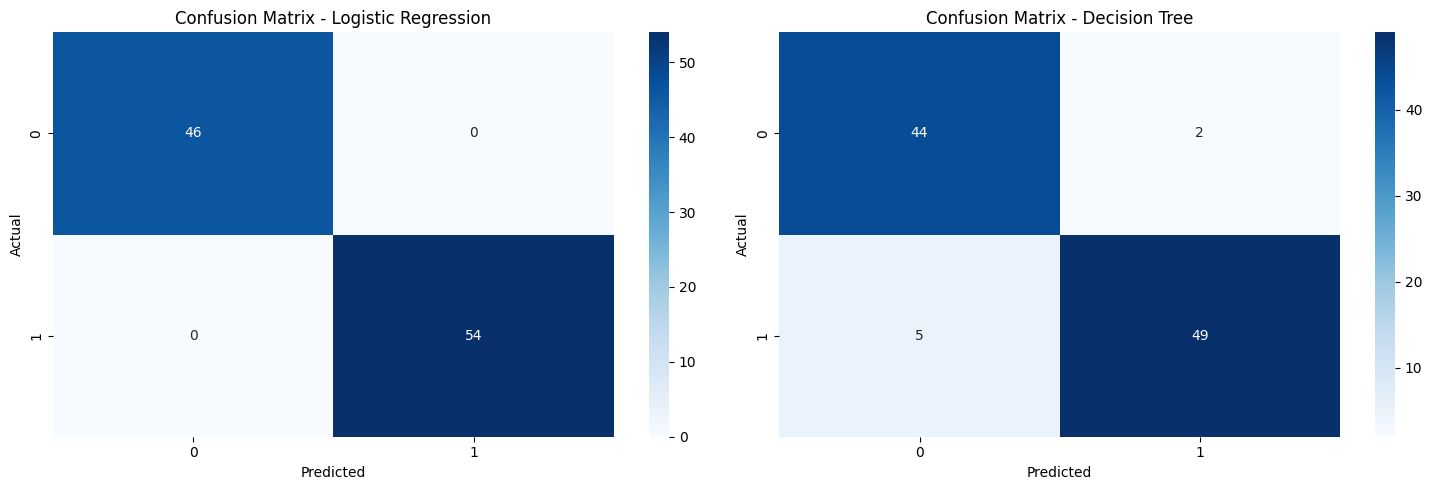

In [5]:
plt.figure(figsize=(15, 5))

for i, (name, pipeline) in enumerate(trained_pipelines.items()):
    metrics = evaluate_model(pipeline, X_test, y_test)
    
    print(f"\n--- {name} ---")
    print(f"Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall:    {metrics['Recall']:.4f}")
    print(f"F1-score:  {metrics['F1-score']:.4f}")
    
    plt.subplot(1, 2, i+1)
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

## 5. Feature Importance (Decision Tree)

/var/folders/18/2wmxnvgs53s3jr0vw0958rjm0000gp/T/ipykernel_94818/3257835950.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')


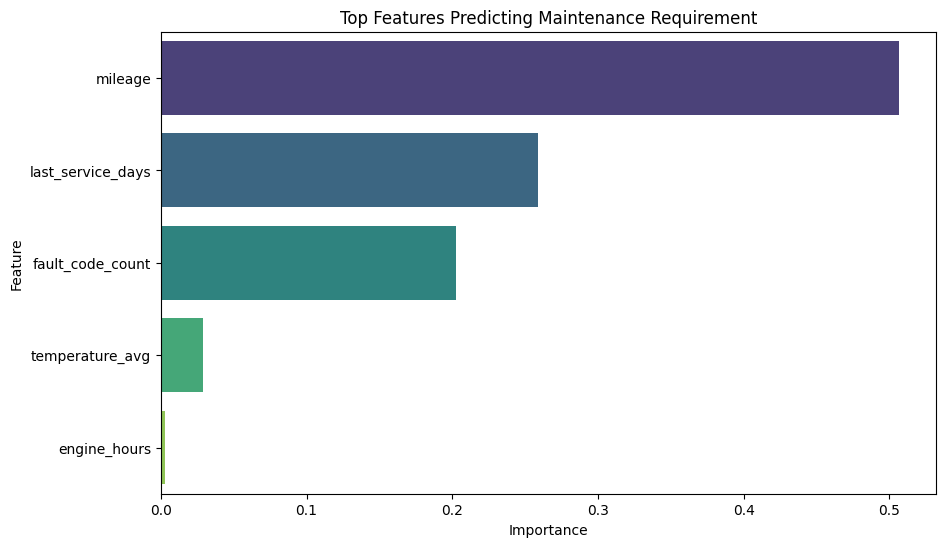

In [6]:
dt_model = trained_pipelines["Decision Tree"]
importances = get_feature_importance(dt_model, X.columns)

if importances:
    imp_df = pd.DataFrame(list(importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')
    plt.title('Top Features Predicting Maintenance Requirement')
    plt.show()